In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from matplotlib import rcParams
from mplsoccer import FontManager
import pandas as pd
import urllib
import os

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [40]:
df = pd.read_csv('D:/stats project/finaldata_csv (for viz)/gi_vs_sca.csv', encoding = "utf-8")

In [9]:
df['player'].unique()

array(['Dimitri Payet', 'Lionel Messi', 'Neymar', 'Luis Muriel',
       'Vinicius Júnior', 'Kevin De Bruyne', 'Jonas Hofmann',
       'Iker Muniain', 'Hakan Çalhanoğlu', 'Lorenzo Pellegrini',
       'Ousmane Dembélé', 'Ángel Di María', 'Nabil Fekir',
       'Jack Grealish', 'Kylian Mbappé', 'Federico Dimarco',
       'Christian Eriksen', 'Ruslan Malinovskyi', 'Florian Wirtz',
       'Joshua Kimmich', 'Thomas Müller', 'Benjamin Bourigeaud',
       'Sofiane Boufal', 'Callum Hudson-Odoi', 'David Silva',
       'Trent Alexander-Arnold', 'Gerard Deulofeu', 'Óscar Trejo',
       'Domenico Berardi', 'Alassane Pléa', 'Filip Kostić', 'Luis Díaz',
       'Téji Savanier', 'Leroy Sané', 'Lorenzo Insigne',
       'Christopher Nkunku', 'Gianluca Caprari', 'Serge Gnabry',
       'Hakim Ziyech', 'Renato Sanches', 'Mohamed Salah',
       'Martin Ødegaard', 'Dominik Szoboszlai', 'Karim Benzema',
       'David Pereira da Costa', 'Bukayo Saka', 'Nedim Bajrami',
       'Luis Alberto', 'Lovro Majer', 'Mason

In [41]:
player = ['Dimitri Payet', 'Lionel Messi',
       'Vinicius Júnior','Hakan Çalhanoğlu', 'Lorenzo Pellegrini',
       'Ousmane Dembélé',
       'Jack Grealish', 'Kylian Mbappé',
       'Christian Eriksen', 'Ruslan Malinovskyi', 'Florian Wirtz', 'Bukayo Saka',
       'Trent Alexander-Arnold',
       'Domenico Berardi', 'Luis Díaz', 
       'Christopher Nkunku', 'Mohamed Salah',
       'Martin Ødegaard','Karim Benzema',
       'Jamal Musiala', 'Nicolò Barella',
       'Jadon Sancho', 'Gerard Moreno']

In [42]:
df_main = df[~df["player"].isin(player)].reset_index(drop = True)
df_highlight = df[df["player"].isin(player)].reset_index(drop = True)

In [36]:
df_highlight

,player,90s,sca90,goals,assists,gi,gi90
0,Dimitri Payet,28.8,6.53,12,10,22,0.76
1,Lionel Messi,23.9,6.02,6,14,20,0.84
2,Vinicius Júnior,29.9,5.69,17,10,27,0.90
3,Hakan Çalhanoğlu,27.6,5.48,7,12,19,0.69
4,Lorenzo Pellegrini,25.4,5.31,9,3,12,0.47
5,Ousmane Dembélé,15.7,5.24,1,13,14,0.89
6,Jack Grealish,21.3,5.17,3,3,6,0.28
7,Ruslan Malinovskyi,17.7,5.03,6,5,11,0.62
8,Florian Wirtz,20.6,4.96,7,10,17,0.83
9,Trent Alexander-Arnold,31.7,4.73,2,12,14,0.44


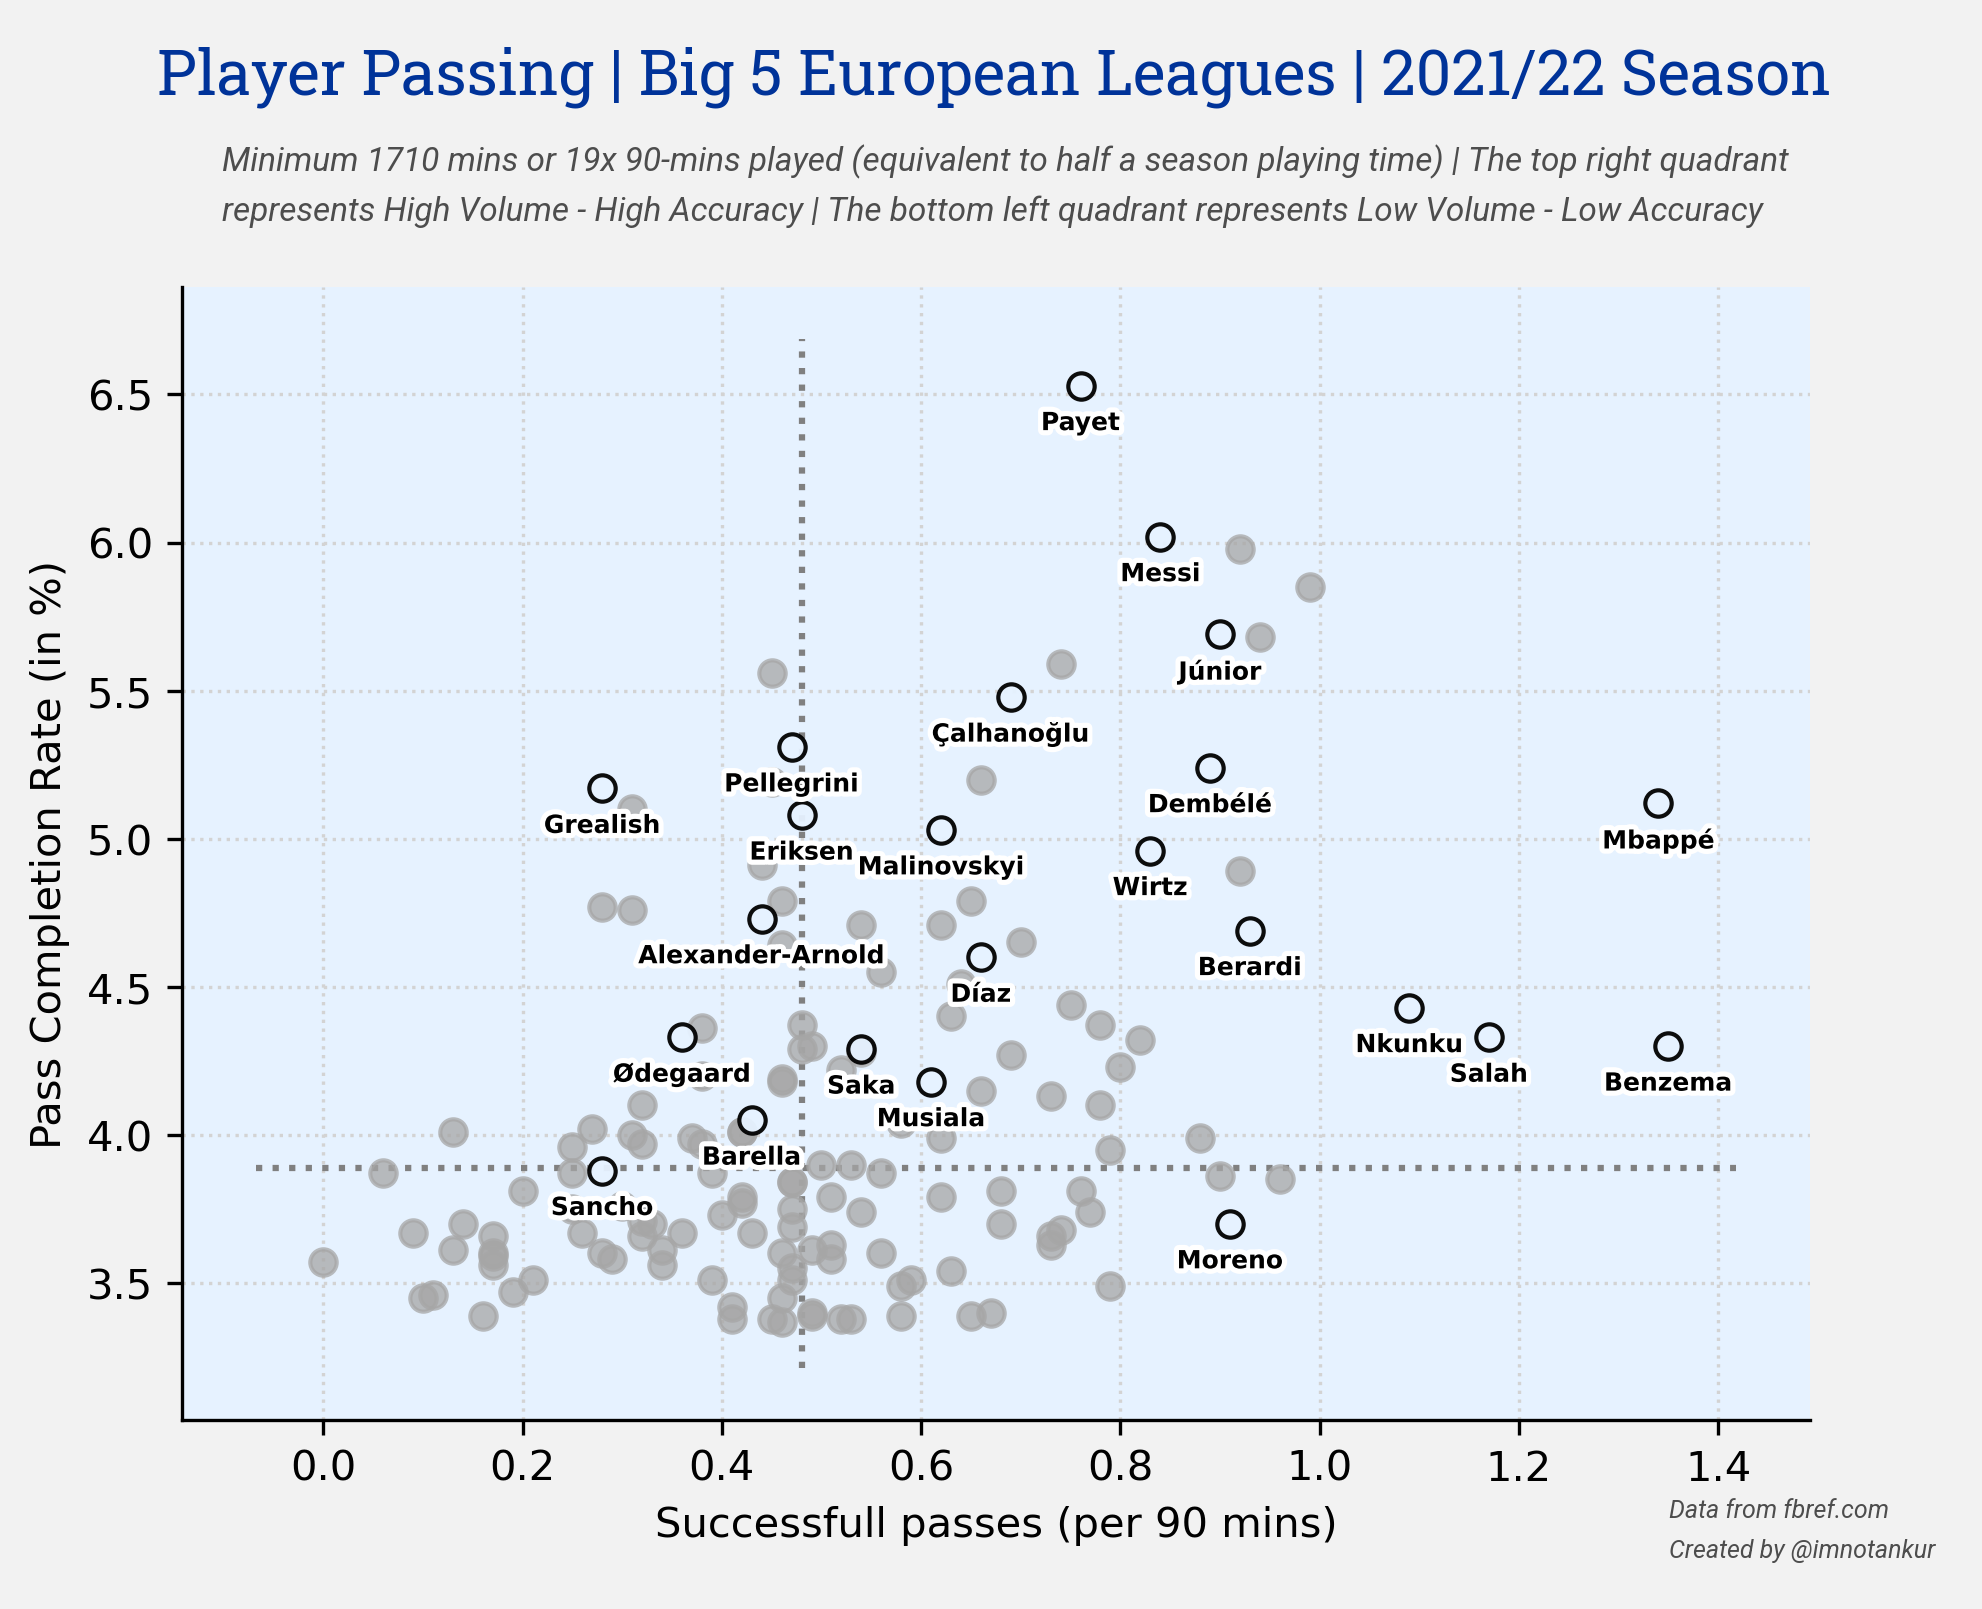

In [43]:
fig = plt.figure(facecolor = "#f2f2f2",figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#e6f2ff")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    df_main["gi90"], 
    df_main["sca90"], 
    s = 40, 
    alpha = 0.75, 
    color = "#a6a6a6",
    zorder = 3
)

ax.scatter(
    df_highlight["gi90"], 
    df_highlight["sca90"], 
    s = 40, 
    alpha = 0.95, 
    color = "#e6f2ff",
    zorder = 3,
    ec = "#000000",
)

ax.plot(
    [df["gi90"].median(), df["gi90"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [df["sca90"].median(), df["sca90"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)

ax.grid(True, ls = ":", color = "lightgray")

for index, name in enumerate(df_highlight["player"]):
    X = df_highlight["gi90"].iloc[index]
    Y = df_highlight["sca90"].iloc[index]
    y_pos = -9
    x_pos = 0
    text_ = ax.annotate(
        xy = (X, Y),
        text = name.split(' ')[1],
        ha = "center",
        va = "center",
        fontsize = 6,
        xytext = (x_pos, y_pos),
        textcoords = "offset points",
        weight = "bold"
    )

    text_.set_path_effects(
                [path_effects.Stroke(linewidth=2.5, foreground="white"), 
                path_effects.Normal()]
            )


ax.set_xlabel("Successfull passes (per 90 mins)")
ax.set_ylabel("Pass Completion Rate (in %)")

fig_text(
    x = 0.91, y = 1.0, 
    s = "Player Passing | Big 5 European Leagues | 2021/22 Season",
    va = "bottom", ha = "right",
    fontsize = 15, color = "#003399", fontproperties = font_bold.prop
)

fig_text(
	x = 0.89, y = 0.92, 
    s = "Minimum 1710 mins or 19x 90-mins played (equivalent to half a season playing time) | The top right quadrant\nrepresents High Volume - High Accuracy | The bottom left quadrant represents Low Volume - Low Accuracy",
	va = "bottom", ha = "right",
	fontsize = 8, color = "#4d4d4d",fontproperties = font_italic.prop
)

fig_text(
    x = 0.96, y = 0.03,
    s = 'Data from fbref.com\nCreated by @imnotankur',
    va = "bottom", ha = 'right',
    fontsize = 6, color = "#4d4d4d", fontproperties = font_italic.prop
)